In [4]:
!pip install seaborn

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv(r'C:\Users\Vai.Mathi\Downloads\ML-Final-Project\UCI_Credit_Card.csv')

print(df.head())





   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

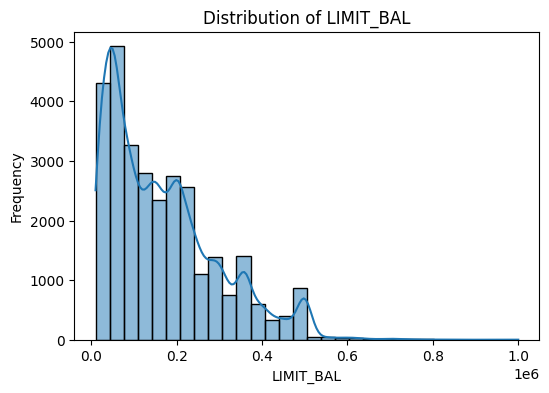

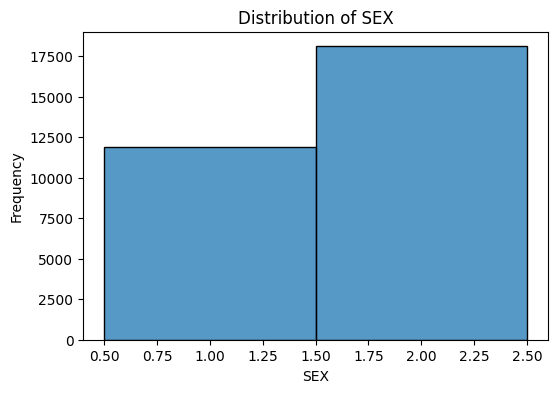

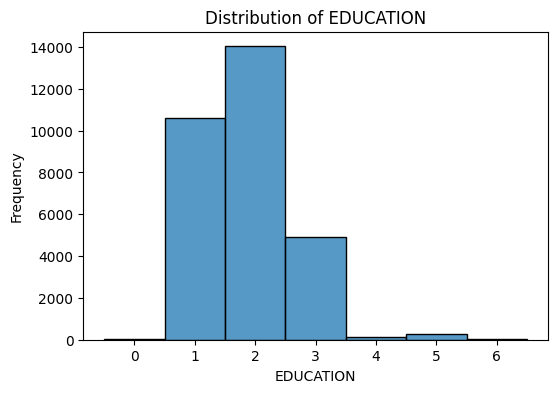

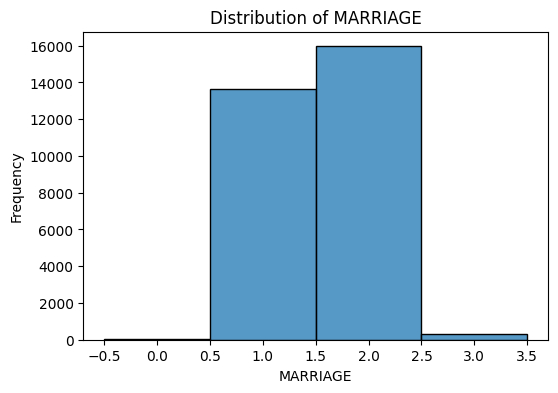

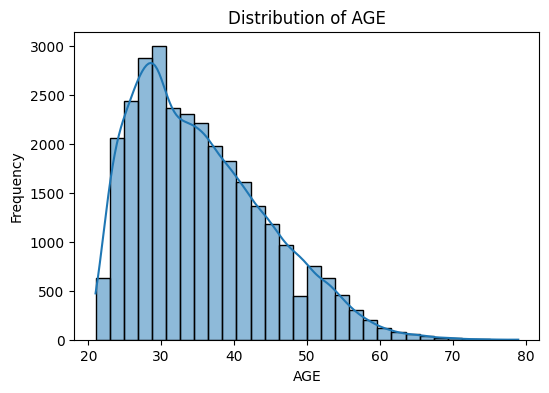

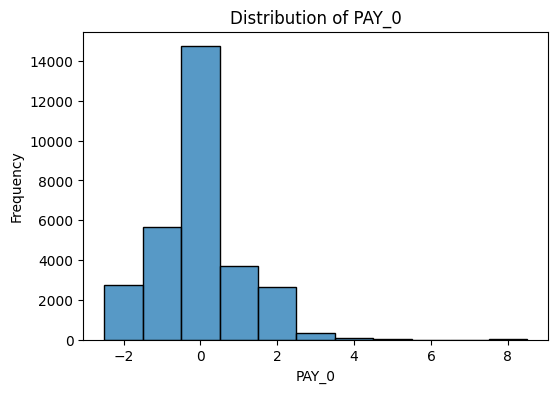

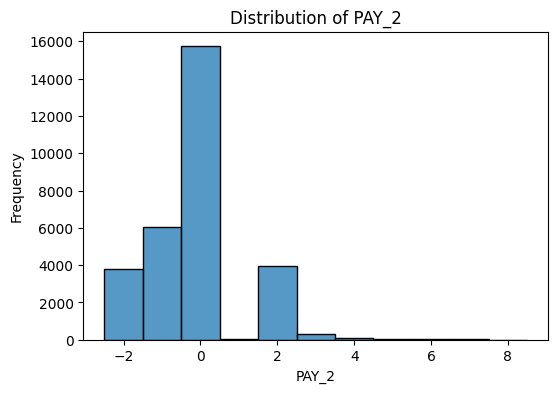

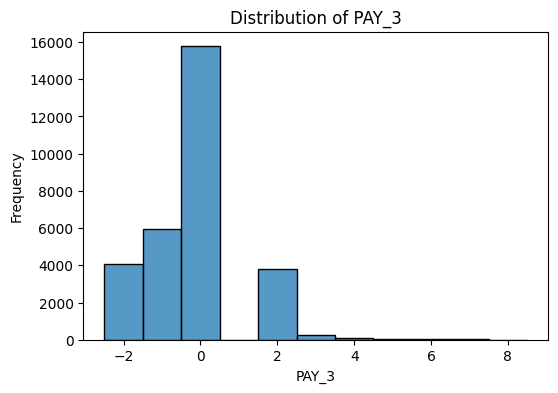

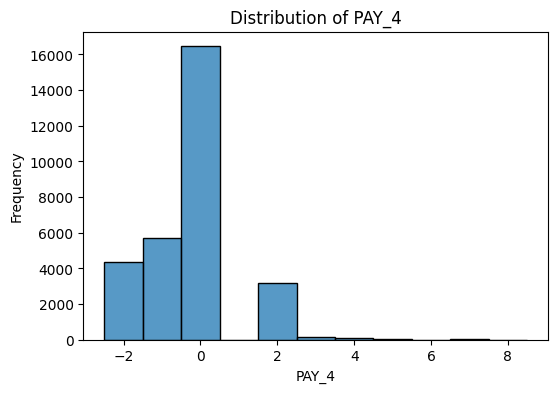

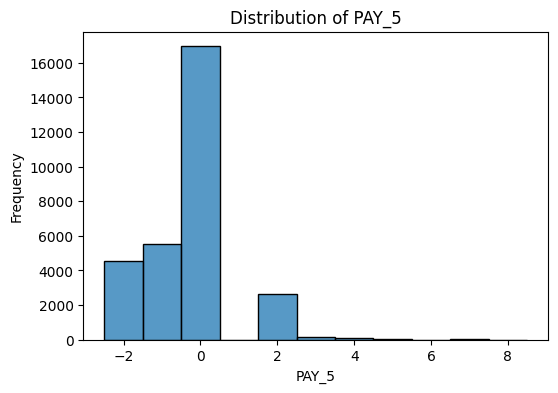

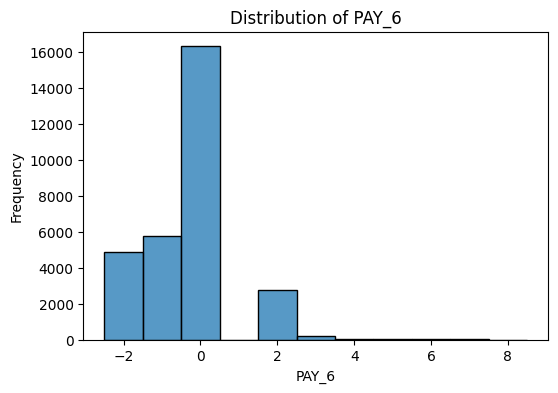

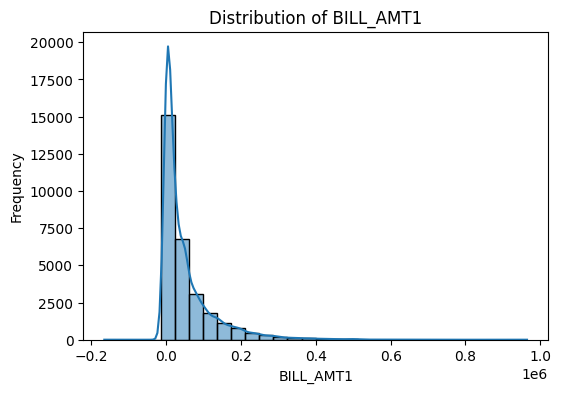

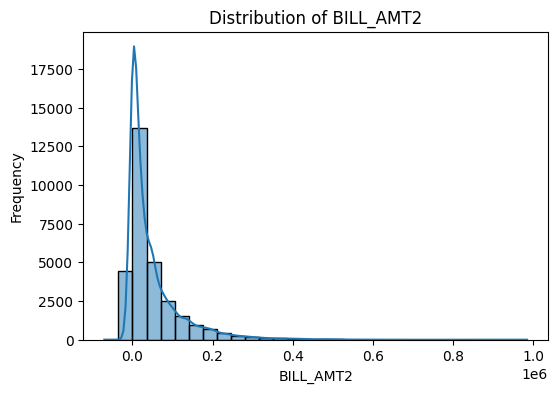

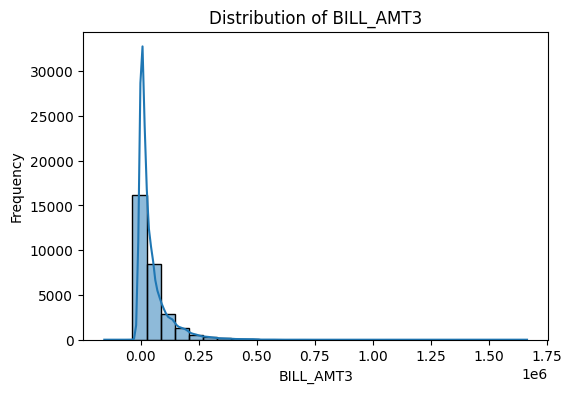

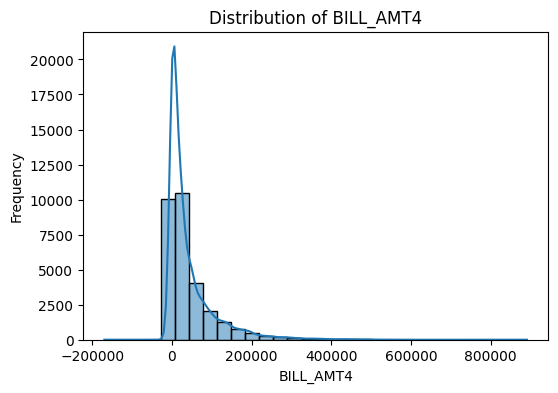

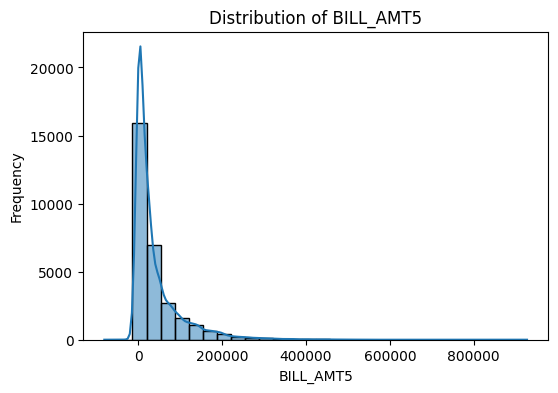

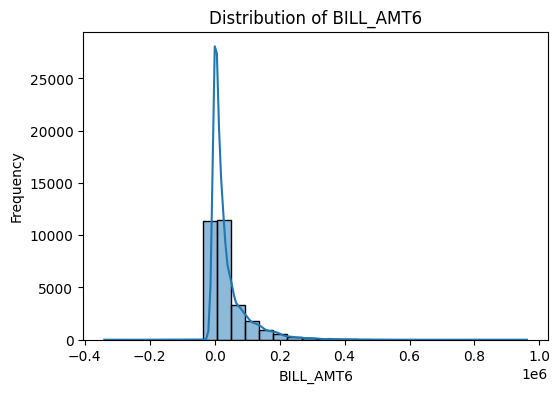

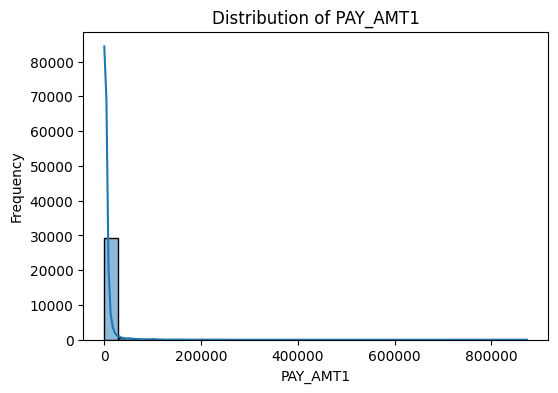

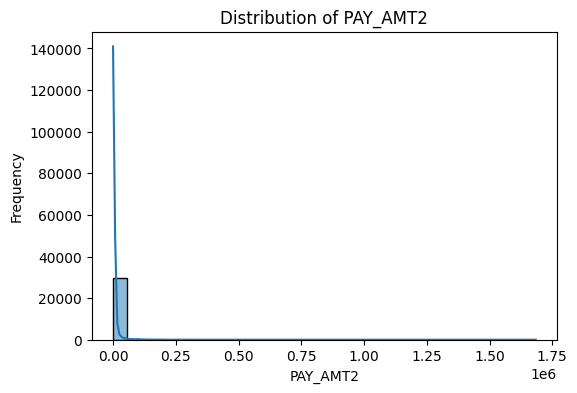

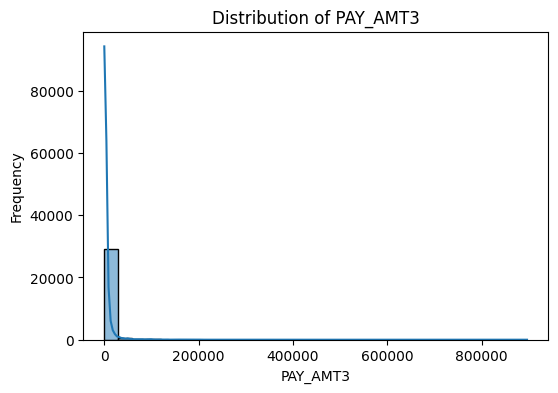

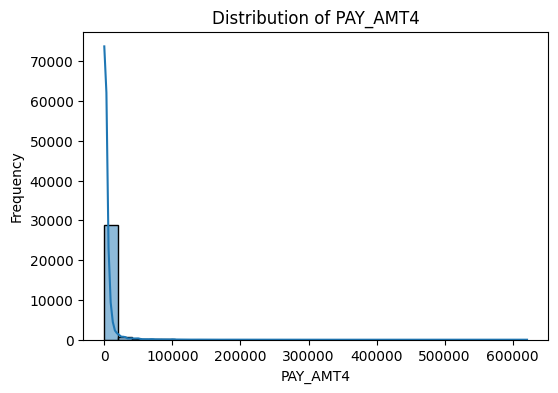

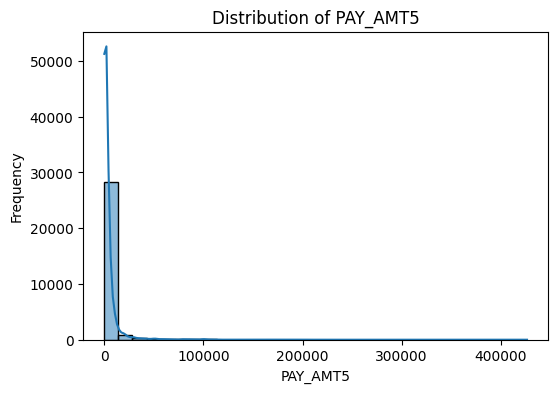

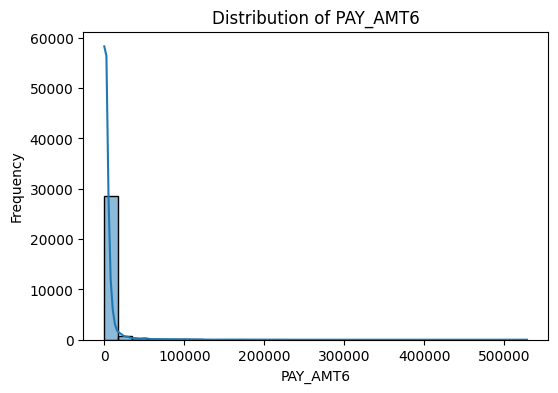

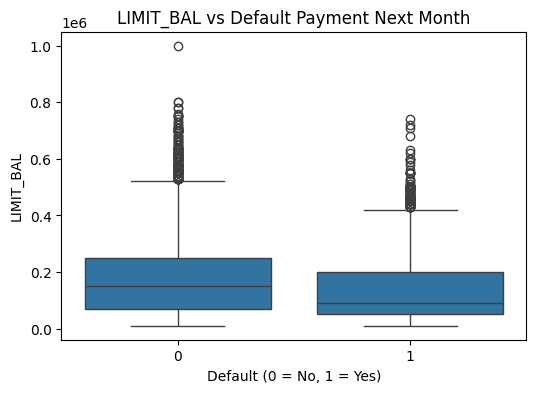

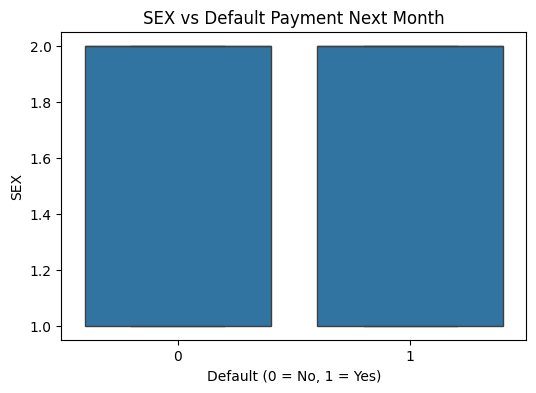

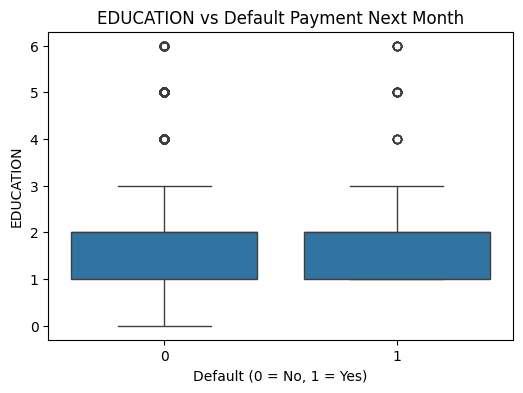

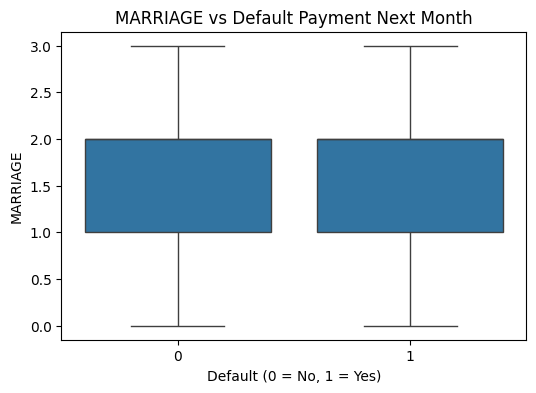

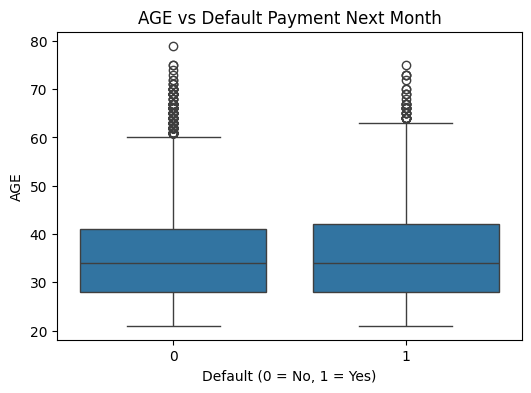

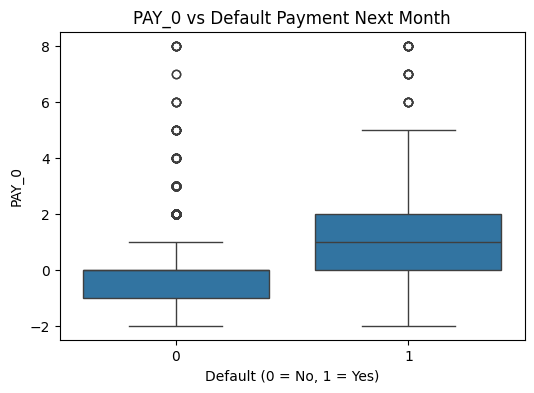

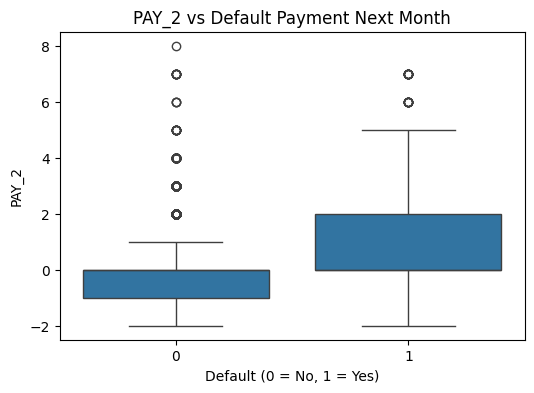

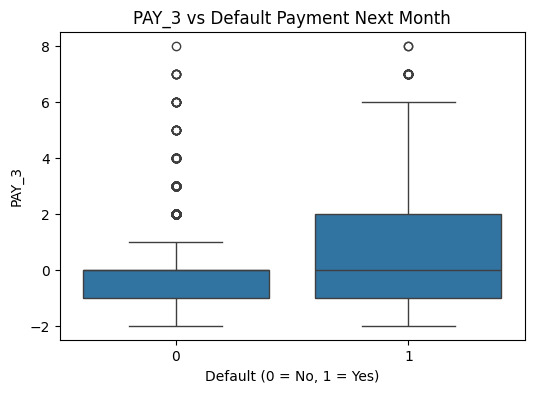

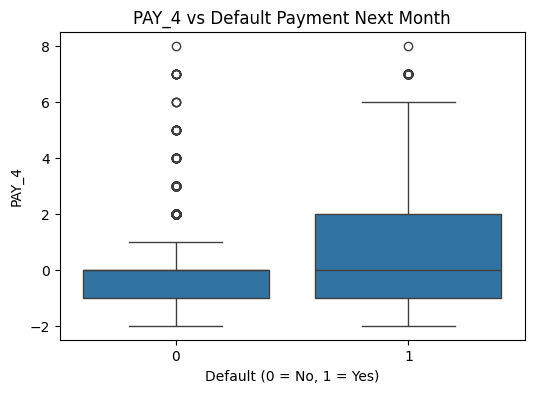

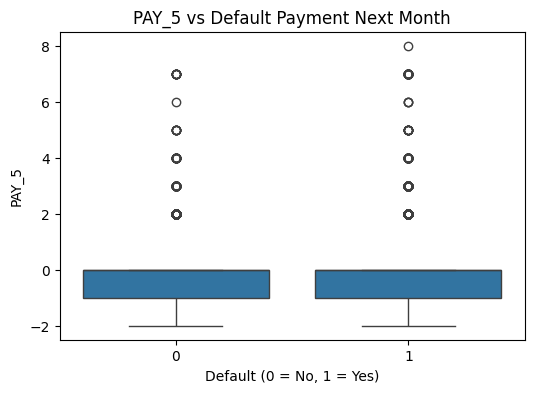

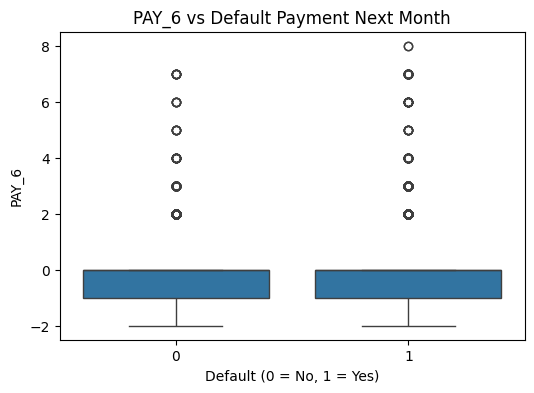

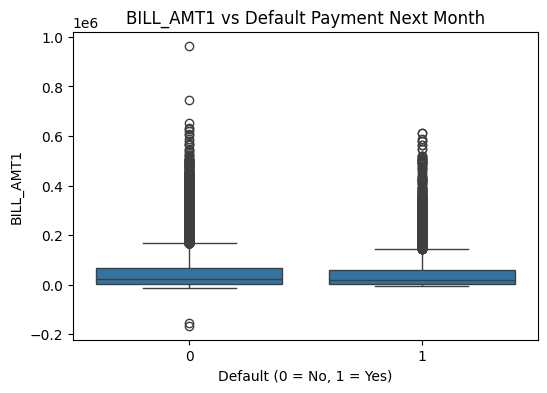

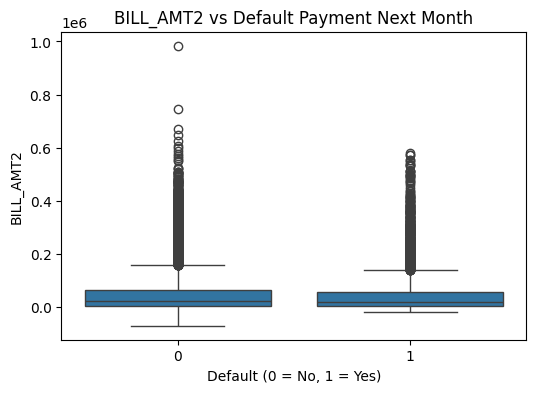

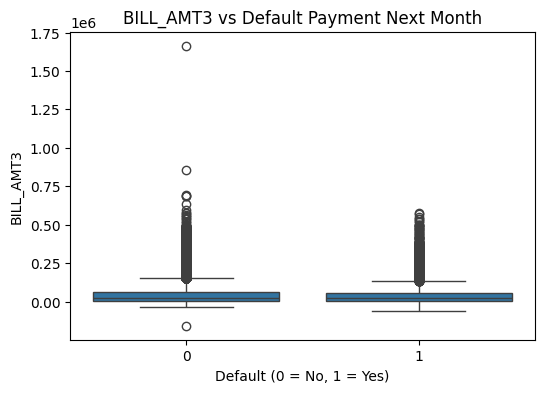

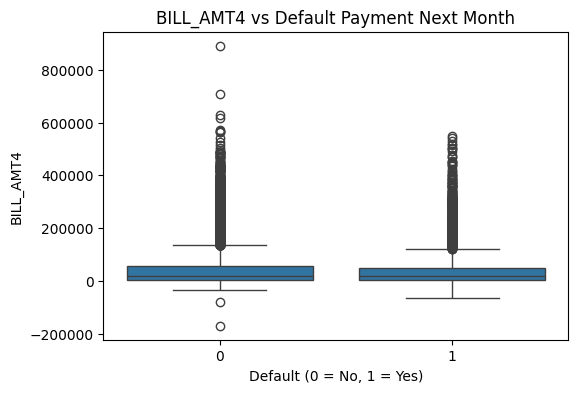

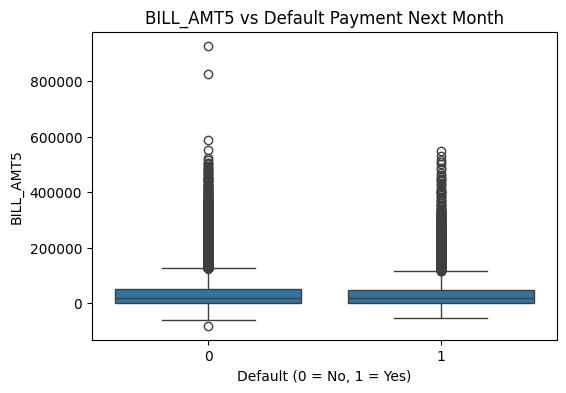

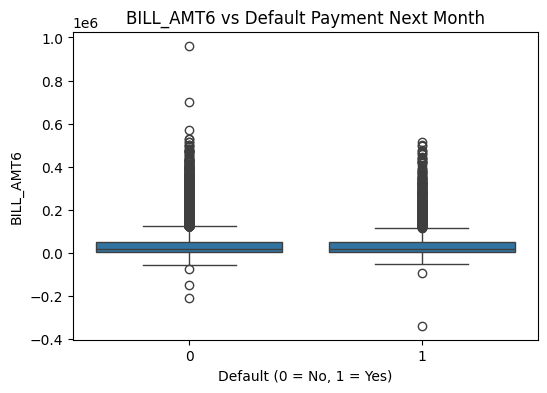

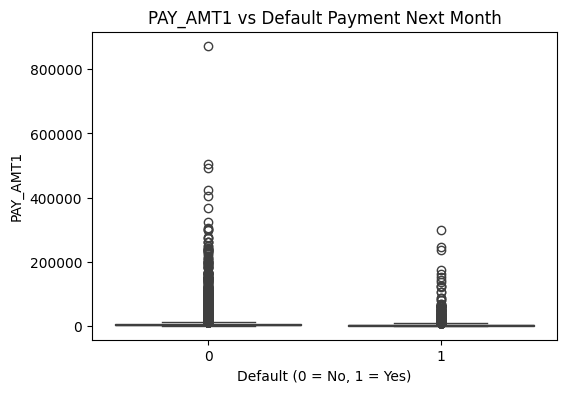

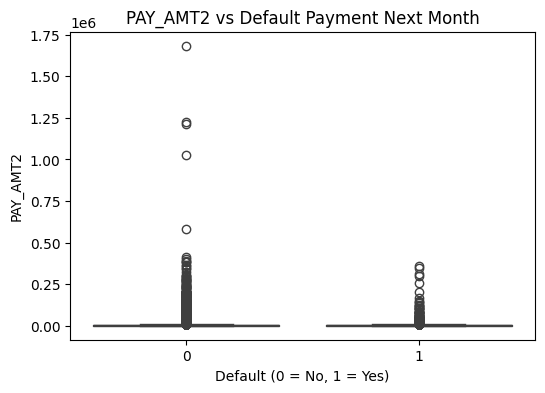

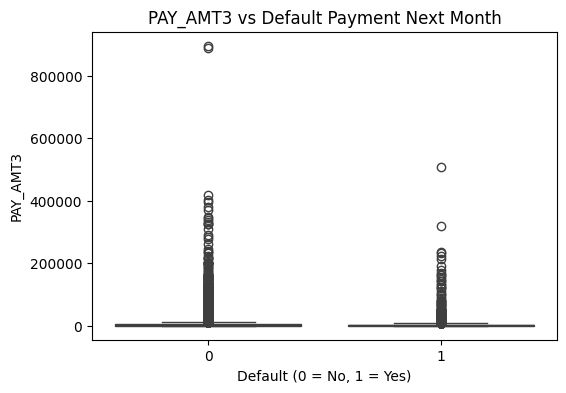

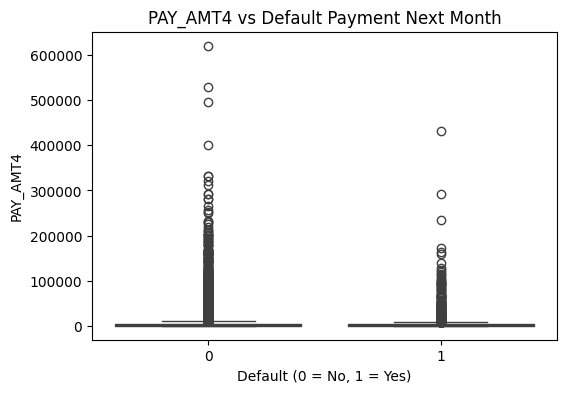

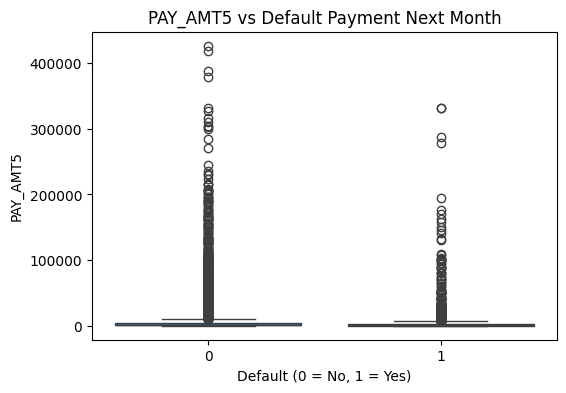

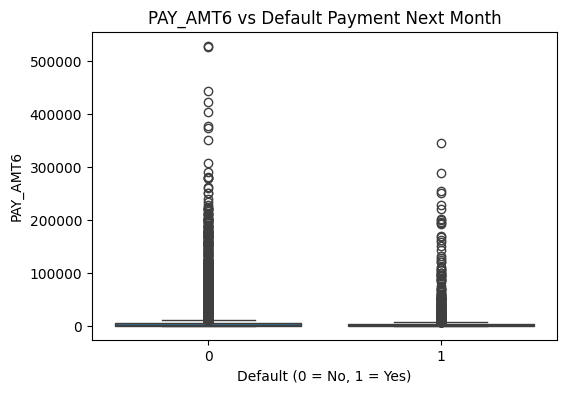

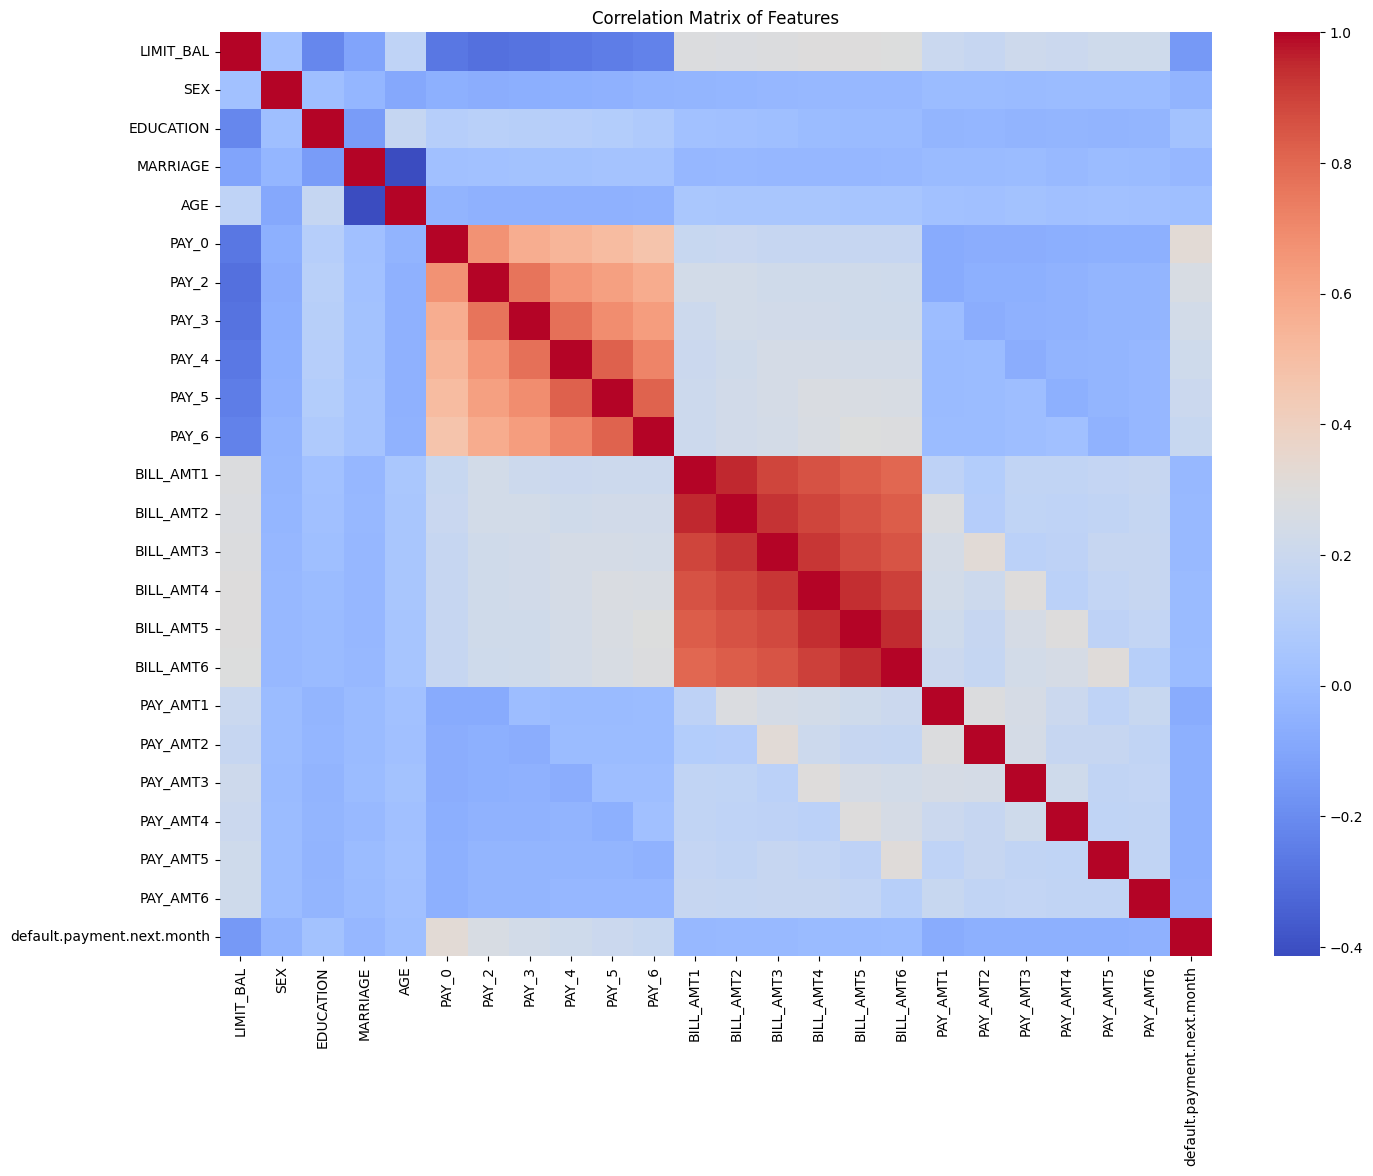

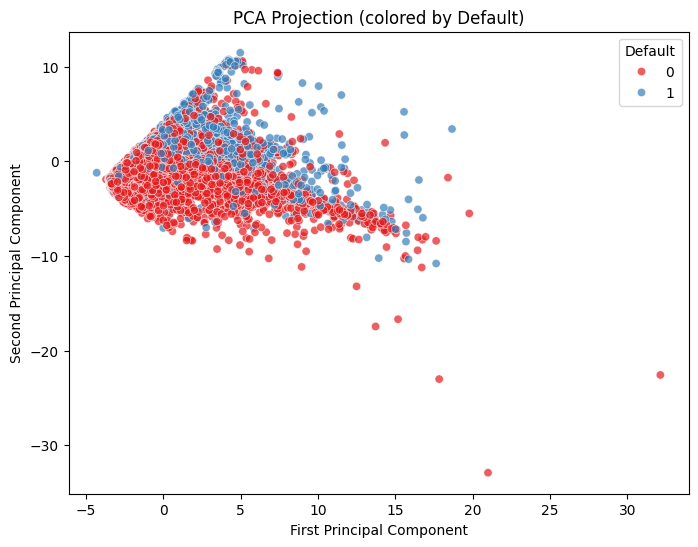

In [7]:
df = df.drop(columns=['ID'])

X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List of discrete features
discrete_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# --- 1. Visualize individual feature distributions ---
for col in X.columns:
    plt.figure(figsize=(6, 4))
    
    if col in discrete_cols:
        sns.histplot(df[col], bins=len(df[col].unique()), discrete=True)
    else:
        sns.histplot(df[col], kde=True, bins=30)
        
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# --- 2. Visualize feature vs. target variable ---
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=df[col])
    plt.title(f'{col} vs Default Payment Next Month')
    plt.xlabel('Default (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.show()

# --- 3. Correlation matrix ---
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

# --- 4. PCA for dimensionality reduction ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title('PCA Projection (colored by Default)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Default')
plt.show()

In [10]:
#Interesting features of the dataset
#1) The balances seem to exponentially decay which makes sense given that many people likely owe a large amount while only a few owe a large amount
#2) The Pay graphs for Pay_2, Pay3, Pay_4, Pay_5, Pay_6 all have very low data values of 1. This suggests that the many people are able to pay on time or fall behind quickly. They rarely forget to pay by just a month. 

#3) Ther eis a strong correlation between number the Pay graphs and default rates and this makes sense because fundamentally because as a person accumulates credit card debt the likelihood they default goes up.

